# Succes or failure of the calls.

The notebook will connect to the Mongo database, 

read all the calls made.

Analyse the statistics of the call types for each scenario type:

- Distribution of success and errors (maybe sub errors?)

output a file with calls, scenario type, success or failure

In [1]:
import sys
import os
import logging
import helperFunctions as hf
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

hf.setup()

fileOutput = "output_folder/UniqueCallsAndOutcomes.csv"

client = MongoClient(hf.getConnectionString())
database=client["observertc-reports"]
calls = database["calls"]

In [2]:
logging.info("Total number of calls: " + str(calls.count_documents({})))

2023-01-31 13:11:04 INFO     Total number of calls: 207901 


In [3]:
df = pd.DataFrame(columns=["scenario", "success", "failed", "failed_setup"])

for i in range (1, 20):
  
  success = calls.count_documents({'scenario_type': str(i), 'logging_type': 'COMMAND_SESSION_SUCCESS'})
  failed = calls.count_documents({'scenario_type': str(i), 'logging_type': 'COMMAND_SESSION_FAILED'})
  failed_setup = calls.count_documents({'scenario_type': str(i), 'logging_type': 'COMMAND_SESSION_FAILED_SETUP'})

  logging.info(f"Scenario: {str(i)} \tSuccess: {str(success)} \tFailed: {str(failed)} \tFailed setup: {str(failed_setup)}")
  
  data = pd.DataFrame(columns=["scenario", "success", "failed", "failed_setup"], data=[[i, success, failed, failed_setup]])
  df = pd.concat([df, data], ignore_index=True)

df.to_csv("output_folder/SuccessOrFail.csv", index=False)

2023-01-31 13:11:05 INFO     Scenario: 1 	Success: 1237 	Failed: 1 	Failed setup: 0 
2023-01-31 13:11:05 INFO     Scenario: 2 	Success: 1088 	Failed: 145 	Failed setup: 5 
2023-01-31 13:11:05 INFO     Scenario: 3 	Success: 1141 	Failed: 90 	Failed setup: 7 
2023-01-31 13:11:05 INFO     Scenario: 4 	Success: 576 	Failed: 636 	Failed setup: 26 
2023-01-31 13:11:06 INFO     Scenario: 5 	Success: 1176 	Failed: 58 	Failed setup: 4 
2023-01-31 13:11:06 INFO     Scenario: 6 	Success: 1145 	Failed: 89 	Failed setup: 4 
2023-01-31 13:11:06 INFO     Scenario: 7 	Success: 1162 	Failed: 73 	Failed setup: 3 
2023-01-31 13:11:06 INFO     Scenario: 8 	Success: 1201 	Failed: 33 	Failed setup: 4 
2023-01-31 13:11:07 INFO     Scenario: 9 	Success: 1178 	Failed: 58 	Failed setup: 2 
2023-01-31 13:11:07 INFO     Scenario: 10 	Success: 892 	Failed: 335 	Failed setup: 11 
2023-01-31 13:11:07 INFO     Scenario: 11 	Success: 699 	Failed: 527 	Failed setup: 11 
2023-01-31 13:11:08 INFO     Scenario: 12 	Succes

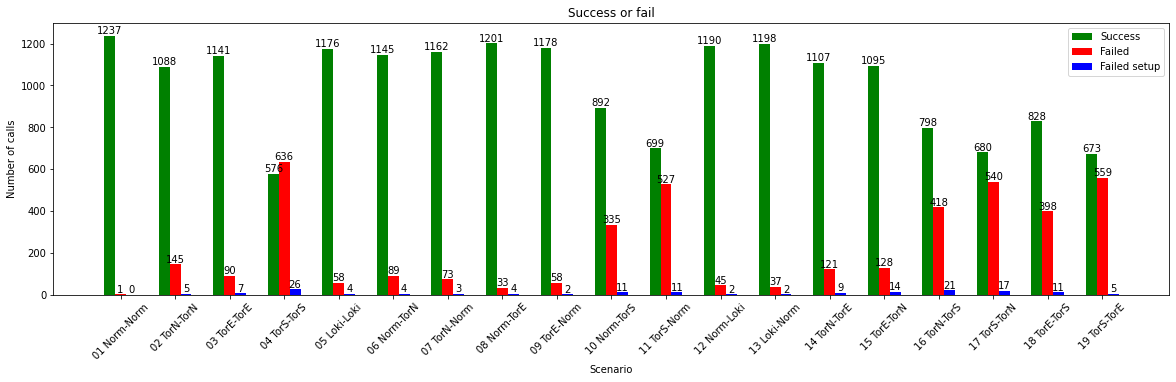

<Figure size 1440x360 with 0 Axes>

In [5]:
ySuccess = df['success']
yFailed = df['failed']
yFailedSetup = df['failed_setup']
x = df['scenario'] - 1

width = 0.2

plt.bar(x-width, ySuccess, width, color='green')
plt.bar(x, yFailed, width, color='red')
plt.bar(x+width, yFailedSetup, width, color='blue')

# show labels on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha='center', va='center', xytext=(0, 5), textcoords='offset points')
            
plt.legend(['Success', 'Failed', 'Failed setup'])
plt.title('Success or fail')
plt.rcParams["figure.figsize"] = [20,5]
plt.xlabel('Scenario')
ticks = hf.getScenarioLabels(df["scenario"].unique())
plt.xticks(range(len(ticks)), ticks, rotation=45)
plt.ylabel('Number of calls')
plt.show()

plt.savefig("output_folder/SuccessOrFail.png", format="png", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.savefig("output_folder/SuccessOrFail.svg", format="svg", bbox_inches='tight', transparent=False, dpi=600, pad_inches=0.1, facecolor='w', edgecolor='w')
plt.show()